# Iteration 3

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

## 1. Data Understanding

### 1.1 Analyzing and merging datasets

In [56]:
df1 = pd.read_csv('set15_it2_final.csv')

In [58]:
df2 = pd.read_csv('set15_it3.csv')

In [60]:
df1

,Unnamed: 0.1,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction
0,0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common,570.988693,True,1
1,1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,1,8,Common,401.028848,True,1
2,2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,2,5,Common,302.776780,True,1
3,3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,3,6,Common,534.705131,True,1
4,4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,4,6,Common,576.370119,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,2310,5,Gleaming,704.664976,True,1
2334,2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,2311,5,Common,802.057696,False,1
2335,2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,2312,5,Common,853.618548,False,1
2336,2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,2313,6,Common,496.129975,True,1


In [62]:
df2

,DI,Craftsmanship,EraConstructed
0,0,6,1201
1,1,7,1112
2,2,4,1338
3,3,5,1212
4,4,5,1042
...,...,...,...
2358,2335,7,1651
2359,2336,6,1519
2360,2337,5,1142
2361,2338,5,1257


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   DI              2363 non-null   int64
 1   Craftsmanship   2363 non-null   int64
 2   EraConstructed  2363 non-null   int64
dtypes: int64(3)
memory usage: 55.5 KB


In [66]:
df2.describe()

,DI,Craftsmanship,EraConstructed
count,2363.000000,2363.000000,2363.000000
mean,1169.813796,6.123572,1409.574270
std,675.447687,1.409403,231.862362
min,0.000000,1.000000,887.000000
25%,584.500000,5.000000,1225.500000
50%,1170.000000,6.000000,1396.000000
75%,1753.500000,7.000000,1617.500000
max,2339.000000,10.000000,1799.000000


In [68]:
df2.sample(5)

,DI,Craftsmanship,EraConstructed
1728,1711,5,1302
568,562,7,1797
1740,1723,7,1165
2139,2119,7,1478
1436,1422,4,1552


In [70]:
df = df1.merge(df2, left_index=True, right_index=True, how="left")

In [72]:
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction,DI,Craftsmanship,EraConstructed
1227,1227,1240,1229,99500.0,GnomeBurough,Mystvale,1011.0,4330.0,1216,5,Gleaming,380.022575,True,1,1216,7,1672
249,249,250,249,188000.0,Meadowlands,Sunspire,1326.0,8924.0,248,5,Gleaming,718.032604,True,1,248,7,1520
643,643,651,644,159500.0,Meadowlands,Dragonspire,918.0,8910.0,636,5,Common,609.181917,True,1,636,7,1566
1977,1977,1999,1979,170000.0,Meadowlands,Nighthaven,938.0,13001.0,1958,5,Common,649.284802,True,1,1958,6,1748
143,143,144,143,611657.0,Meadowlands,Silverglen,1818.0,12919.0,142,6,Common,2336.115259,False,0,142,5,1184


### 1.2 Checking for data quality issues

In [75]:
df.isna().sum()

Unnamed: 0.1           0
Unnamed: 0             0
DI_x                   0
TradeValue             0
RealmType              0
Enclave                0
LivingQuarters         0
ParcelSize (sqft)      0
DI_y                   0
StructuralIntegrity    0
ExteriorCharm          0
MonthlyPayment         0
AffordableDwelling     0
Prediction             0
DI                     0
Craftsmanship          0
EraConstructed         0
dtype: int64

No null values

In [78]:
df.duplicated().sum()

0

no duplicated values either

In [81]:
df['Craftsmanship'].unique()

array([ 6,  7,  4,  5,  8,  9,  2,  3, 10,  1], dtype=int64)

In [83]:
df['EraConstructed'].unique()

array([1201, 1112, 1338, 1212, 1042, 1416, 1629, 1085, 1666, 1311, 1465,
       1649, 1077, 1433, 1295, 1663, 1188, 1319, 1609, 1617, 1176, 1496,
       1125, 1342, 1437, 1785, 1671, 1547, 1101, 1303, 1058, 1501, 1356,
       1537, 1002, 1367, 1406, 1632, 1705, 1667, 1471, 1291, 1360, 1363,
       1142, 1082, 1676, 1745, 1014, 1488, 1681, 1131, 1161, 1725, 1283,
       1425, 1023, 1296, 1492, 1272, 1287, 1289, 1490, 1735, 1271, 1025,
       1239, 1327, 1566, 1402, 1708, 1794, 1689, 1247, 1563, 1602, 1518,
       1684, 1276, 1664, 1380, 1599, 1046, 1752, 1177, 1094, 1073, 1008,
       1121, 1470, 1267, 1314, 1499, 1588, 1774, 1345, 1710, 1152, 1383,
       1385, 1232, 1509, 1782, 1362, 1028, 1423, 1278, 1581, 1249, 1330,
       1241, 1696, 1678, 1378, 1619, 1116, 1736, 1640, 1213, 1315, 1679,
       1244, 1631, 1193, 1093, 1209, 1698, 1013, 1539, 1763, 1559, 1237,
       1038, 1184, 1624, 1251, 1699, 1576, 1427, 1729, 1123, 1238, 1552,
       1343, 1536, 1130, 1308, 1149, 1182, 1525, 12

In [85]:
df['EraConstructed'].value_counts()

EraConstructed
1313    11
1221     9
1271     9
1285     9
1316     9
        ..
1392     1
1615     1
1715     1
1412     1
1528     1
Name: count, Length: 768, dtype: int64

### 1.3 Graphs

<Axes: >

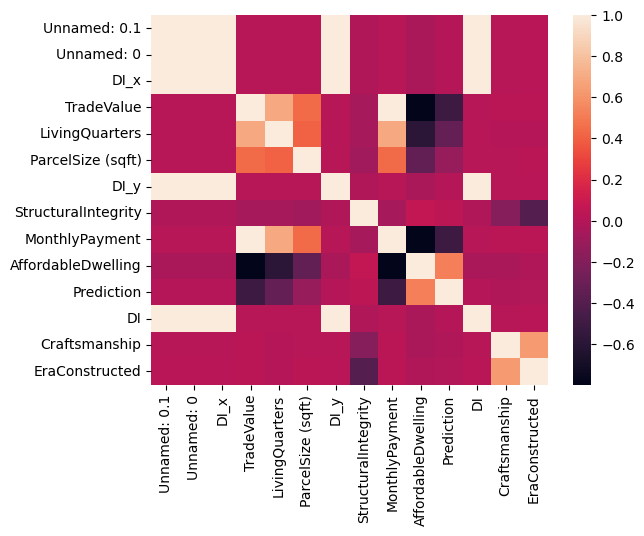

In [88]:
sns.heatmap(df.corr(numeric_only=True, method='spearman'))

<Axes: >

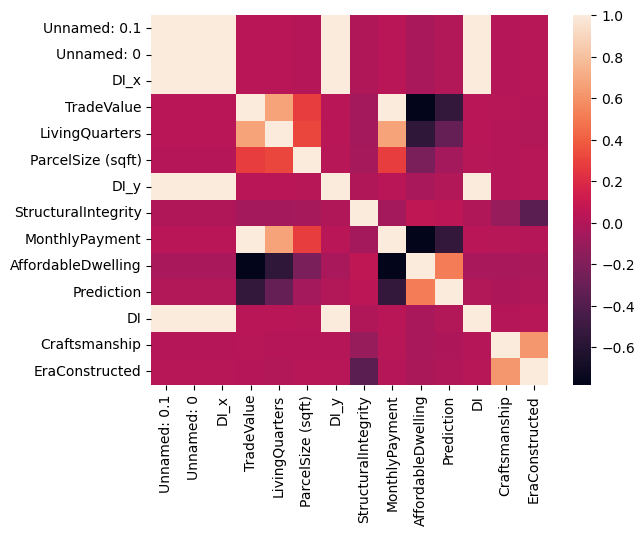

In [90]:
sns.heatmap(df.corr(numeric_only=True, method='pearson'))